In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


# Reading Files

In [3]:
# Read the CSV file
features = pd.read_csv('../data/processedData/training_data.csv')

# Display the first few rows of the data
print(features)

                LOG_ID            PAT_ID               MRN  Cardiovascular  \
0     d754f06a7d973a26  837532f458d9c660  0b8de903ea63082a             0.0   
1     5a95970d5c8fc355  fd18a41f136ed278  0a8b72c1cec4ae47             0.0   
2     138d44a06cf4b57f  fd18a41f136ed278  0a8b72c1cec4ae47             0.0   
3     82372dc4703ea1b0  648781c95d863ec6  e0cb9244fedd1ac7             0.0   
4     4b6aabaf62e85c0a  d1d7b9ddc4962cdf  3918b79e03cefe27             0.0   
...                ...               ...               ...             ...   
1599  8116aa4a100ceee8  478a3cd8857cc055  72accda5075f7a39             1.0   
1600  3c146c502e1e249d  fa6ec9ad3f5f1466  2408210232a3e06b             0.0   
1601  cecd35a626c55d0c  b9878cd048a80cb3  5b9cf2e5349171e8             1.0   
1602  3333ade5695c0b55  2f091eb1b00105d4  c280ccc5e979b4ef             0.0   
1603  c34b85c0cf941d8a  b5838d1cdf37c09c  d7946ede59551209             1.0   

       LOS  ICU_ADMIN_FLAG      HEIGHT    WEIGHT  SEX  ASA_RATI

In [4]:
# Display all column names
features_columns_list = features.columns
print(features_columns_list)

Index(['LOG_ID', 'PAT_ID', 'MRN', 'Cardiovascular', 'LOS', 'ICU_ADMIN_FLAG',
       'HEIGHT', 'WEIGHT', 'SEX', 'ASA_RATING_C', 'Abnormal Flag',
       'ORDER_STATUS_IMPACT', 'discharge_risk_level', 'BIRTH_DATE',
       'PATIENT_CLASS_GROUP', 'PATIENT_CLASS_NM', 'systolic_peak',
       'diastolic_peak', 'pulse_amplitude', 'arc_peak_frequency',
       'arc_spectral_energy', 'arc_bandwidth', 'qrs_freq_power',
       'vf_freq_power', 'vt_freq_power', 'qrs_peak_freq', 'ecg_std_magnitude',
       'Calcium', 'Erythrocyte distribution width',
       'Erythrocyte mean corpuscular hemoglobin',
       'Erythrocyte mean corpuscular hemoglobin concentration',
       'Erythrocyte mean corpuscular volume', 'Erythrocytes', 'Hematocrit',
       'Hemoglobin', 'cardiac_history'],
      dtype='object')


In [5]:
wave_path = '../data/processedData/waveform_features.csv'

# Read the CSV file
wave = pd.read_csv(wave_path)

# Display the first few rows of the data
print(wave)

                LOG_ID  systolic_peak  diastolic_peak  pulse_amplitude  \
0     00fbb475a02e94c3         252.12           32.00           220.11   
1     011e00acde3a3342       16279.61         1685.74         14593.87   
2     0124e746e00e3b4a        1520.99          189.51          1331.48   
3     01953a9111bff808        1304.10          171.75          1132.35   
4     01dc302bc8104d42        1958.25          290.57          1667.67   
...                ...            ...             ...              ...   
1143  ff5c0ba0edf25cf2        3465.44          476.34          2989.10   
1144  ff9d82108883542a         207.40           26.07           181.34   
1145  ffc167ad138cf4a7        2423.18          309.71          2113.47   
1146  ffcb585a8a103c92         173.08           26.02           147.06   
1147  ffcc94cd9bc06e15       15660.18         1684.57         13975.61   

      arc_peak_frequency  arc_spectral_energy  arc_bandwidth  qrs_freq_power  \
0                   7.25       

In [55]:
# Display all column names
columns_list = wave.columns
print(columns_list)

Index(['LOG_ID', 'systolic_peak', 'diastolic_peak', 'pulse_amplitude',
       'arc_peak_frequency', 'arc_spectral_energy', 'arc_bandwidth',
       'qrs_freq_power', 'vf_freq_power', 'vt_freq_power', 'qrs_peak_freq',
       'ecg_std_magnitude'],
      dtype='object')


In [56]:
# Check for missing values in the data
missing_values = wave.isnull().sum()

# Display the number of missing values in each column
print(missing_values)

LOG_ID                 0
systolic_peak          0
diastolic_peak         0
pulse_amplitude        0
arc_peak_frequency     0
arc_spectral_energy    0
arc_bandwidth          0
qrs_freq_power         0
vf_freq_power          0
vt_freq_power          0
qrs_peak_freq          0
ecg_std_magnitude      0
dtype: int64


In [72]:
print(features.dtypes)

LOG_ID                                                    object
PAT_ID                                                    object
MRN                                                       object
Cardiovascular                                           float64
LOS                                                      float64
ICU_ADMIN_FLAG                                             int64
HEIGHT                                                   float64
WEIGHT                                                   float64
SEX                                                        int64
ASA_RATING_C                                             float64
Abnormal Flag                                            float64
ORDER_STATUS_IMPACT                                      float64
discharge_risk_level                                       int64
BIRTH_DATE                                                 int64
PATIENT_CLASS_GROUP                                        int64
PATIENT_CLASS_NM         

### Violin Plot of Cardiovascular Features by Condition

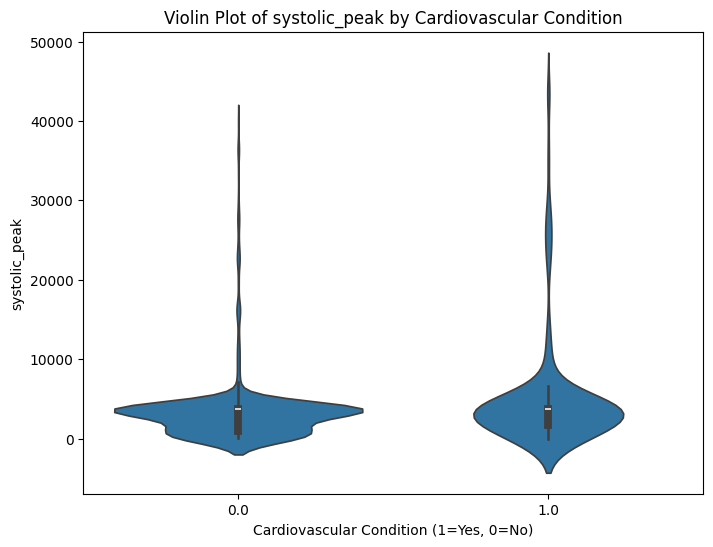

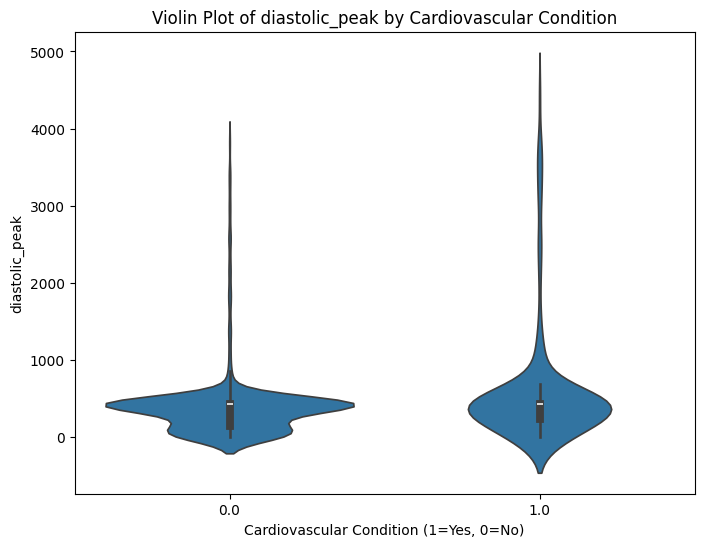

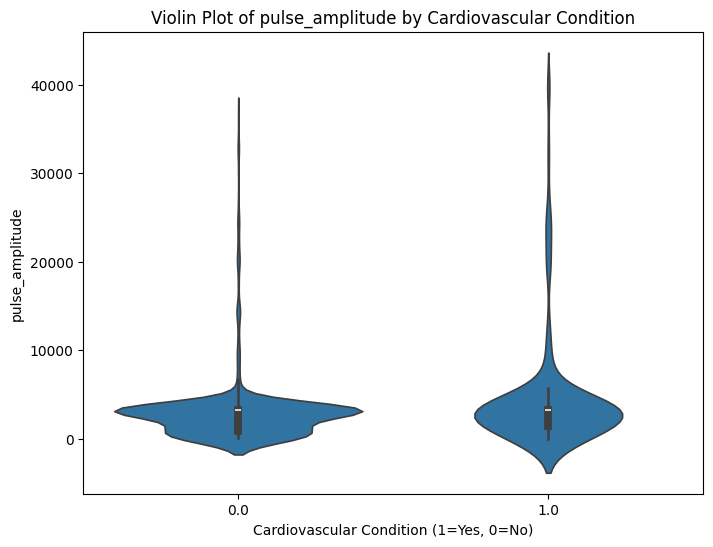

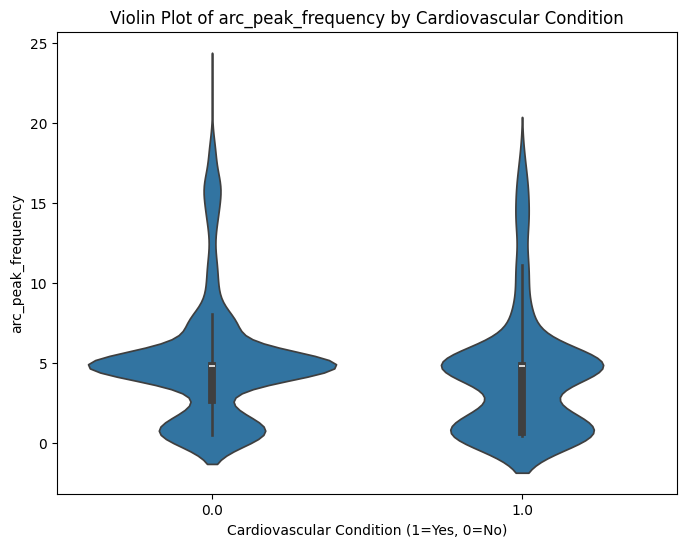

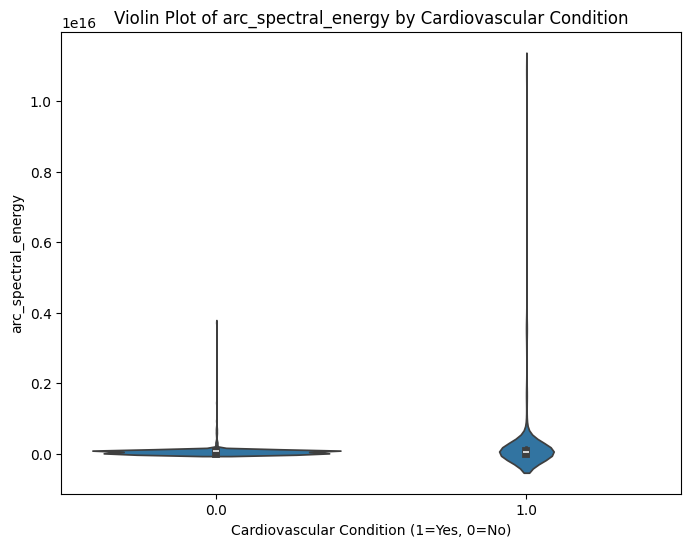

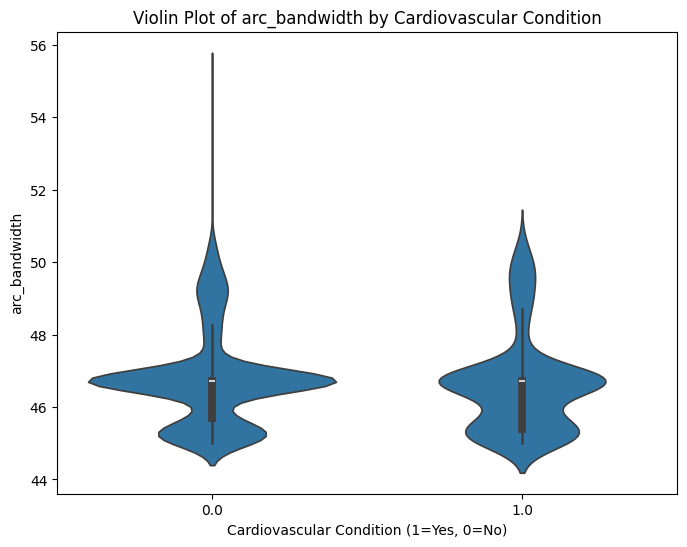

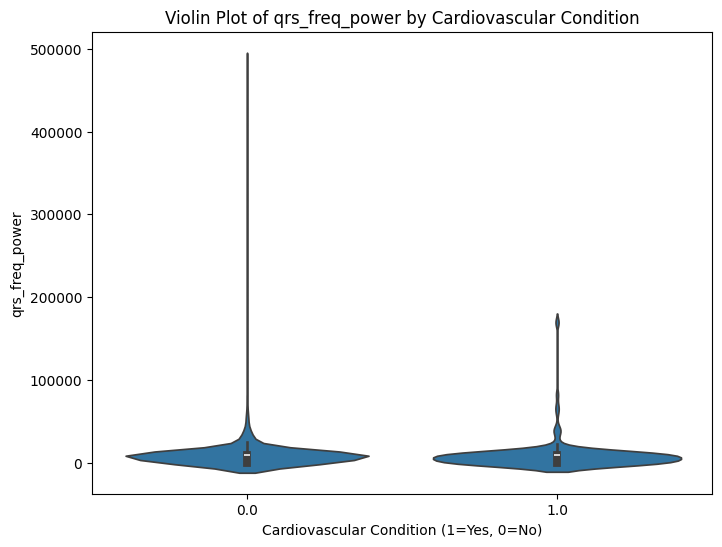

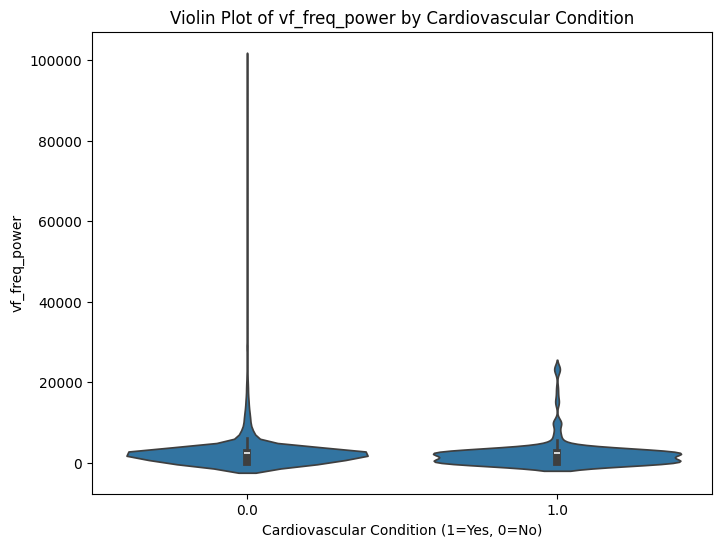

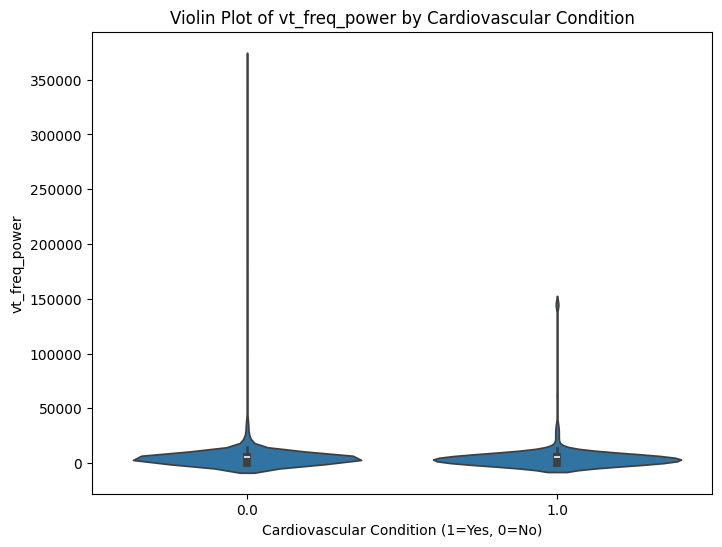

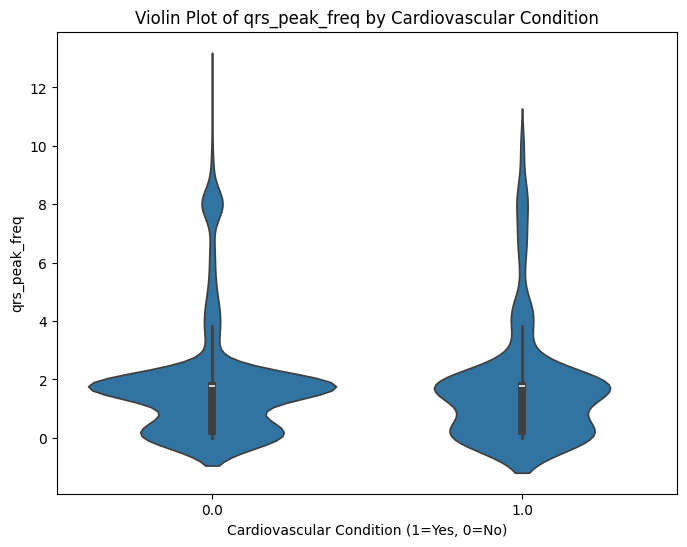

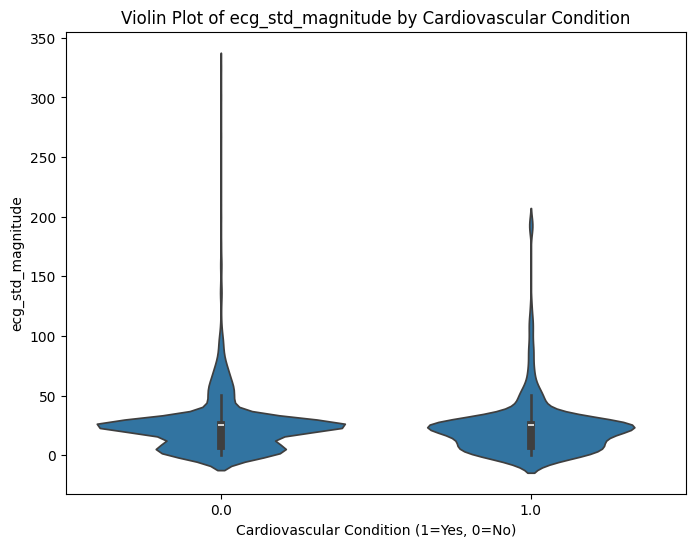

In [6]:
# List of variables to plot violin plots for
variables = ['systolic_peak', 'diastolic_peak', 'pulse_amplitude', 'arc_peak_frequency', 
             'arc_spectral_energy', 'arc_bandwidth', 'qrs_freq_power', 
             'vf_freq_power', 'vt_freq_power', 'qrs_peak_freq', 'ecg_std_magnitude']

# Loop through each variable and plot a violin plot
for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Cardiovascular', y=variable, data=features)
    plt.title(f'Violin Plot of {variable} by Cardiovascular Condition')
    plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
    plt.ylabel(variable)
    plt.show()

### Normalized Violin Plot of Cardiovascular Features by Condition

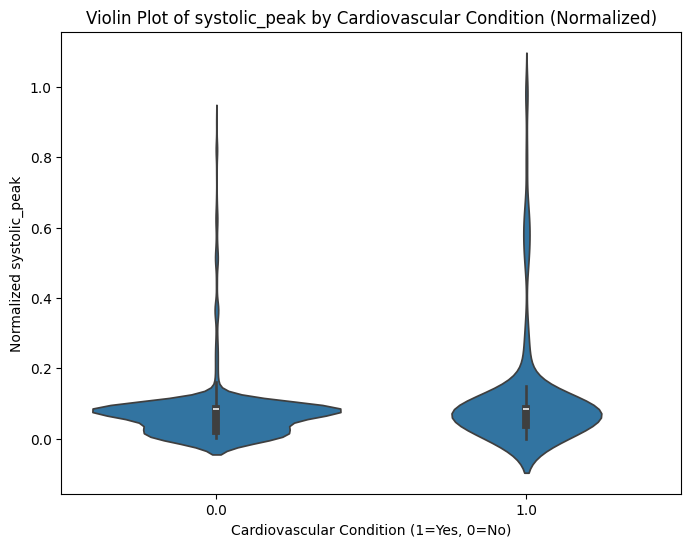

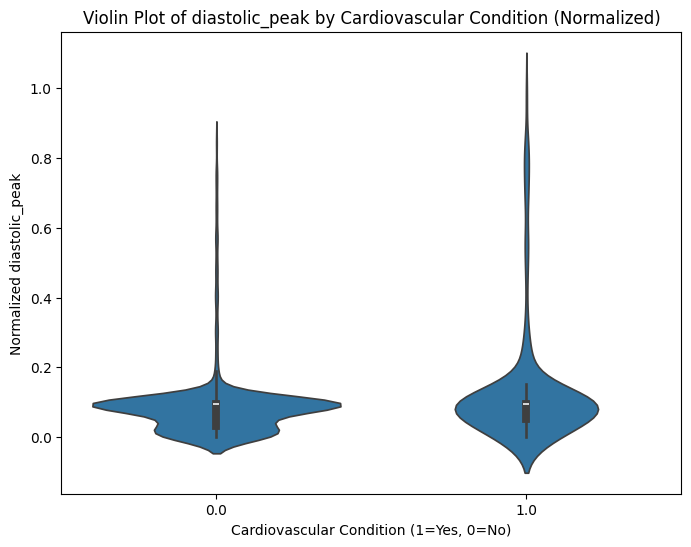

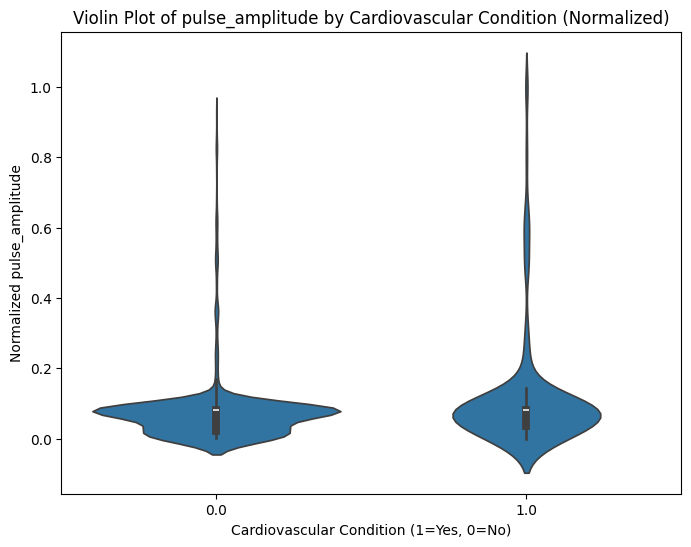

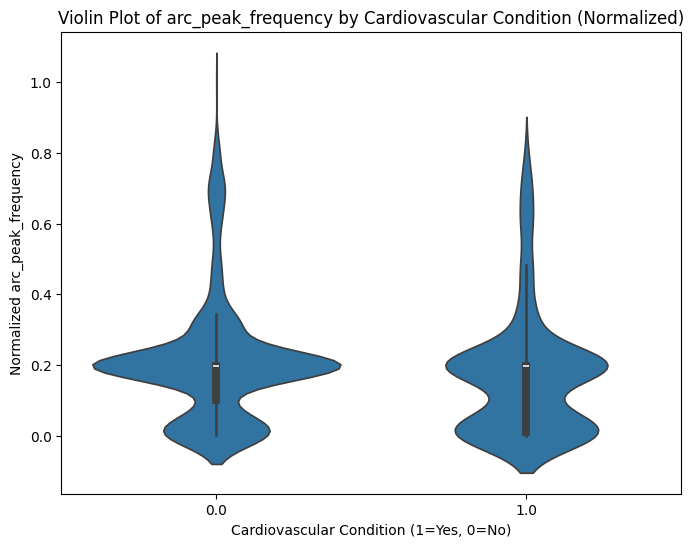

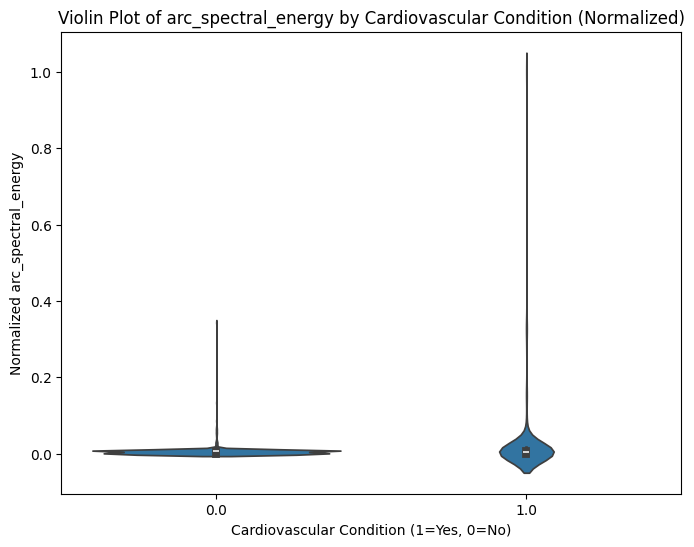

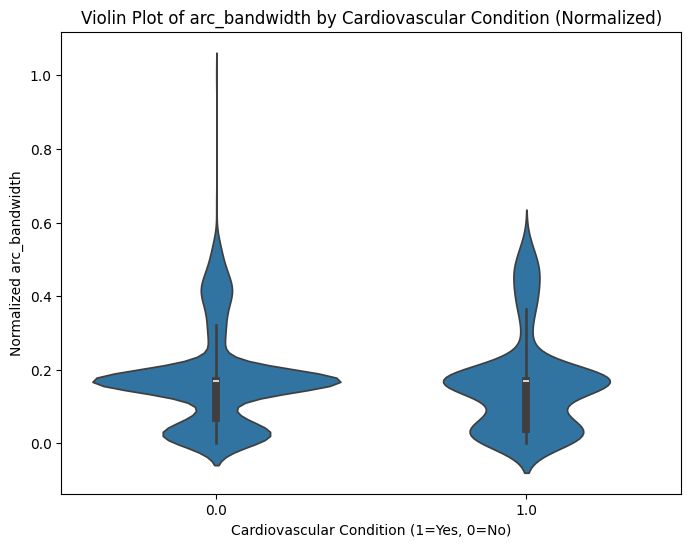

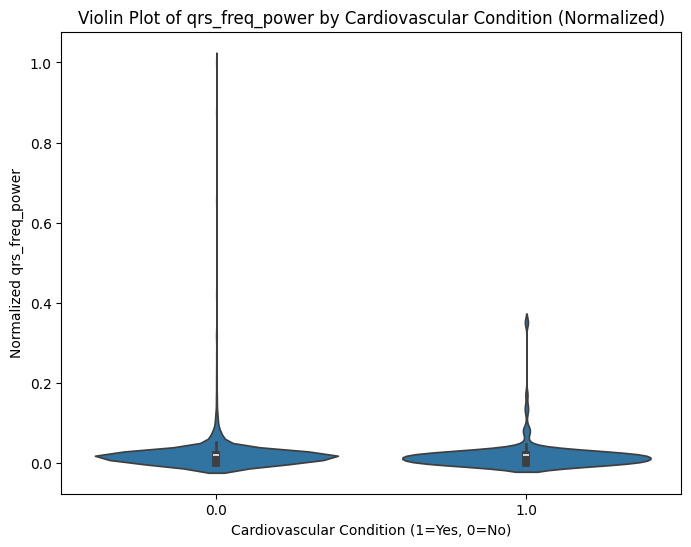

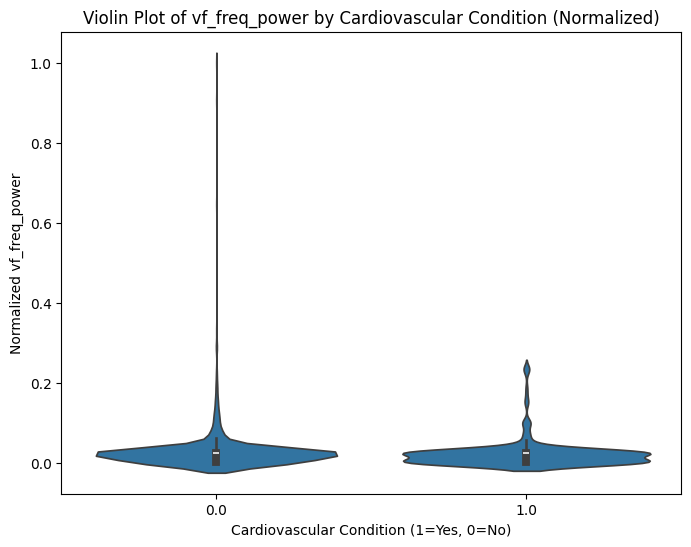

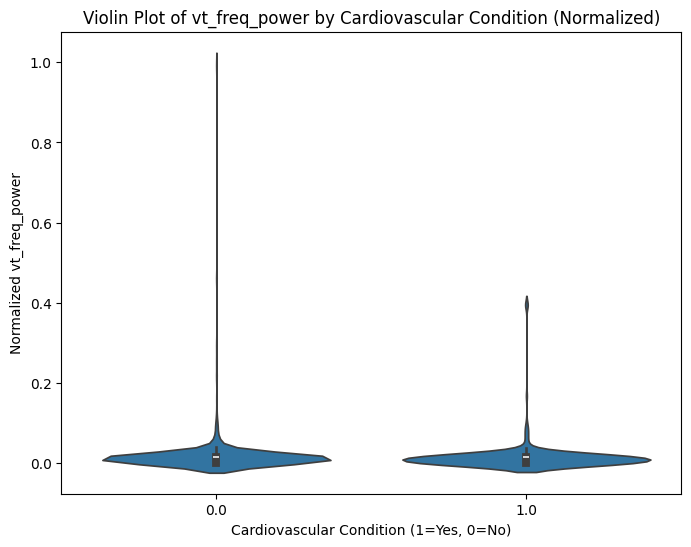

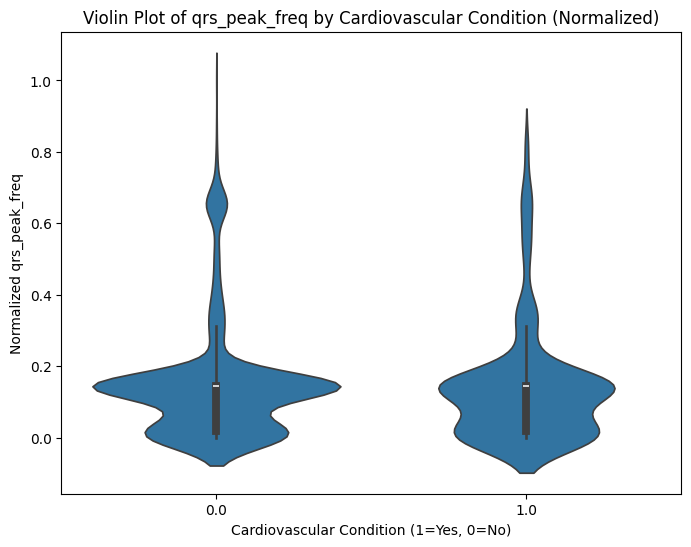

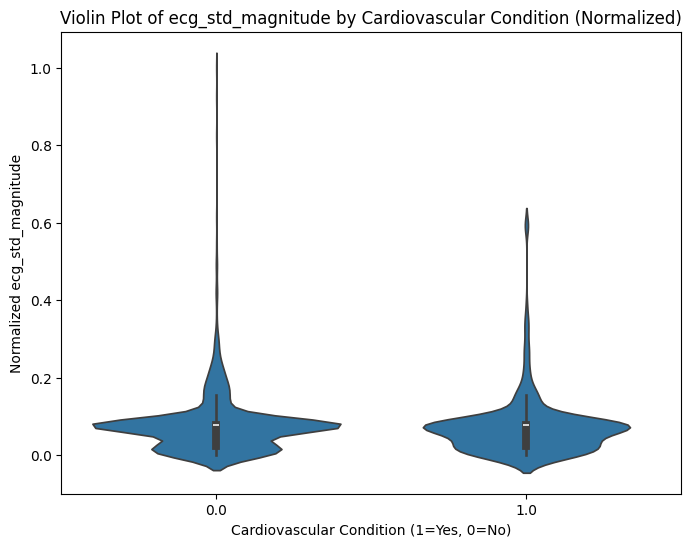

In [7]:
# List of variables to normalize
variables = ['systolic_peak', 'diastolic_peak', 'pulse_amplitude', 'arc_peak_frequency', 
             'arc_spectral_energy', 'arc_bandwidth', 'qrs_freq_power', 
             'vf_freq_power', 'vt_freq_power', 'qrs_peak_freq', 'ecg_std_magnitude']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the specified variables, creating a new DataFrame
scaled_features = scaler.fit_transform(features[variables])
scaled_df = pd.DataFrame(scaled_features, columns=variables)

# Retain the 'Cardiovascular' column in the scaled_df
scaled_df['Cardiovascular'] = features['Cardiovascular']

# Use the normalized data to plot violin plots
for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Cardiovascular', y=variable, data=scaled_df)
    plt.title(f'Violin Plot of {variable} by Cardiovascular Condition (Normalized)')
    plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
    plt.ylabel(f'Normalized {variable}')
    plt.show()

### Correlation Heatmap of Selected Cardiovascular Features

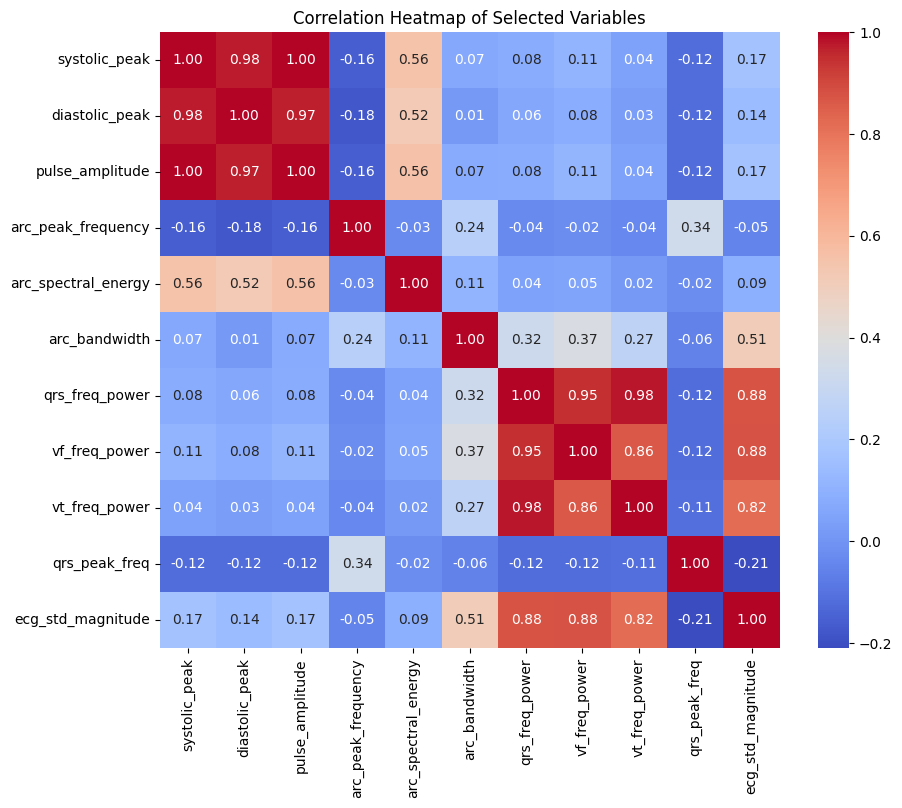

In [78]:
# Compute correlation matrix for selected variables
corr_matrix = features[variables].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Heatmap of Selected Variables')

plt.show()

### Height Distribution with KDE

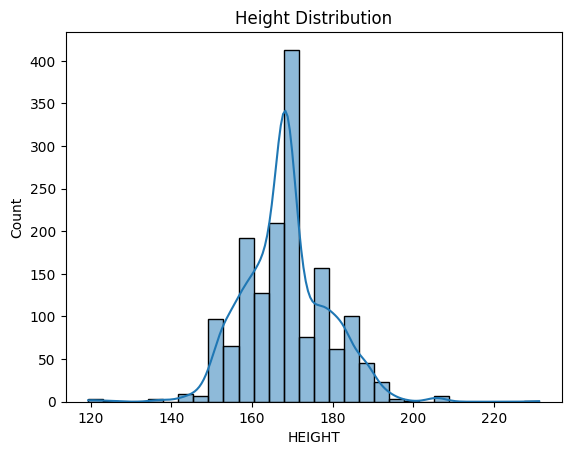

In [79]:
# Histogram to show the distribution of height
sns.histplot(features['HEIGHT'], bins=30, kde=True)

# Add title
plt.title('Height Distribution')

plt.show()

### Weight Distribution with KDE

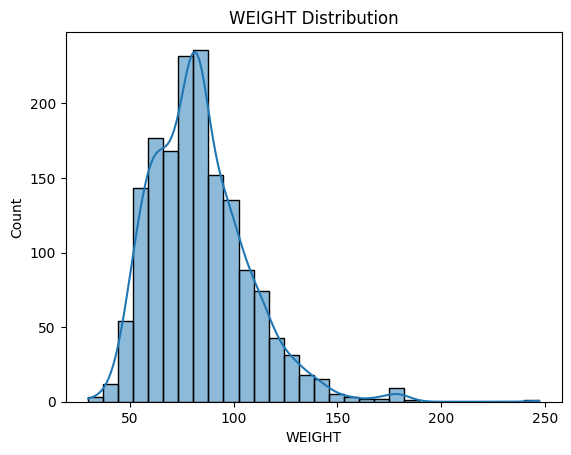

In [80]:
# Histogram to show the distribution of weight
sns.histplot(features['WEIGHT'], bins=30, kde=True)

# Add title
plt.title('Weight Distribution')

plt.show()

### Length of Stay (LOS) Distribution with KDE

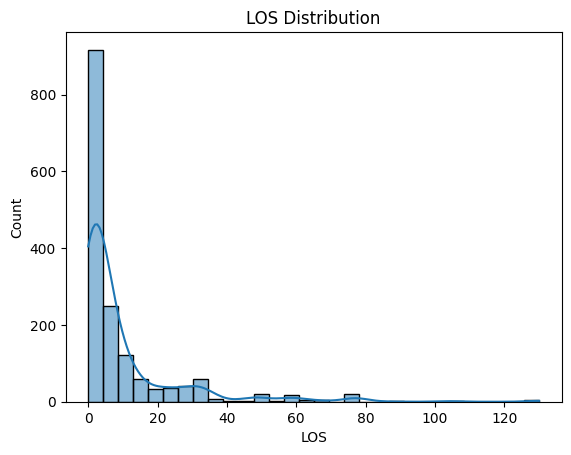

In [81]:
# Histogram to show the distribution of Length of Stay (LOS)
sns.histplot(features['LOS'], bins=30, kde=True)

# Add title
plt.title('LOS Distribution')

plt.show()

### Patient Count by Age Group and Cardiovascular Condition

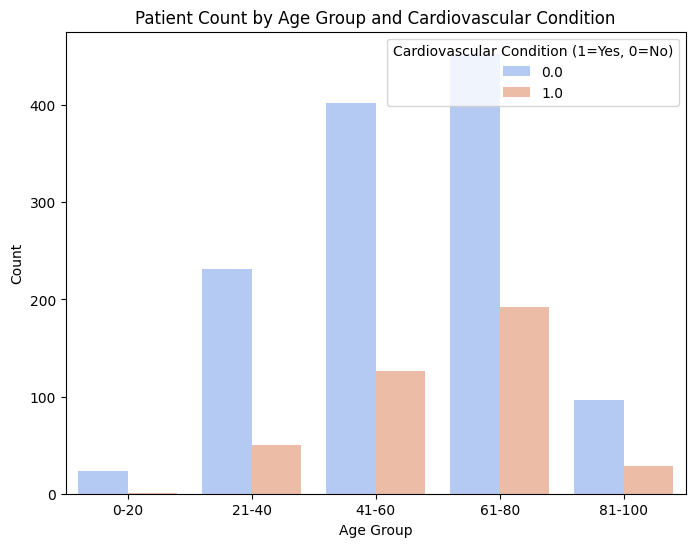

In [83]:
# Group age into age ranges
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
features['AGE_GROUP'] = pd.cut(features['BIRTH_DATE'], bins=bins, labels=labels)

# Plot a bar chart with Cardiovascular grouping by age group
plt.figure(figsize=(8, 6))
sns.countplot(x='AGE_GROUP', hue='Cardiovascular', data=features, palette='coolwarm')

# Add title and labels
plt.title('Patient Count by Age Group and Cardiovascular Condition')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Cardiovascular Condition (1=Yes, 0=No)')

plt.show()

### Height vs Weight Scatter Plot

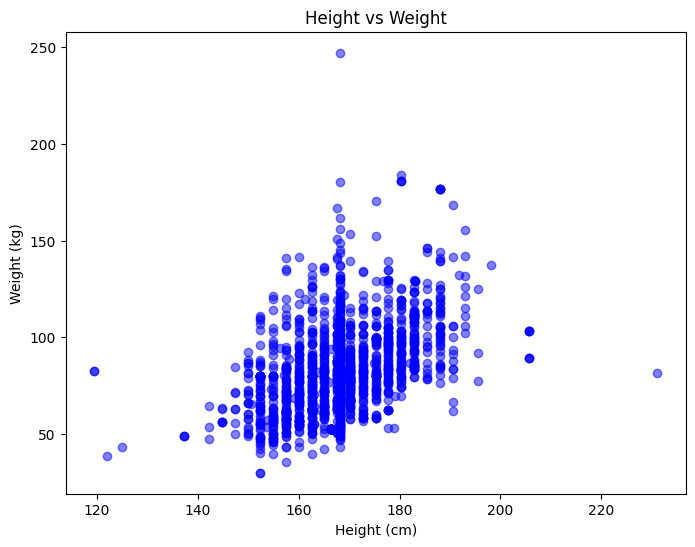

In [84]:
# Scatter plot to show the relationship between height and weight
plt.figure(figsize=(8, 6))
plt.scatter(features['HEIGHT'], features['WEIGHT'], alpha=0.5, c='blue')

# Add title and labels
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

plt.show()

### ICU Admission vs Length of Stay (LOS) Box Plot

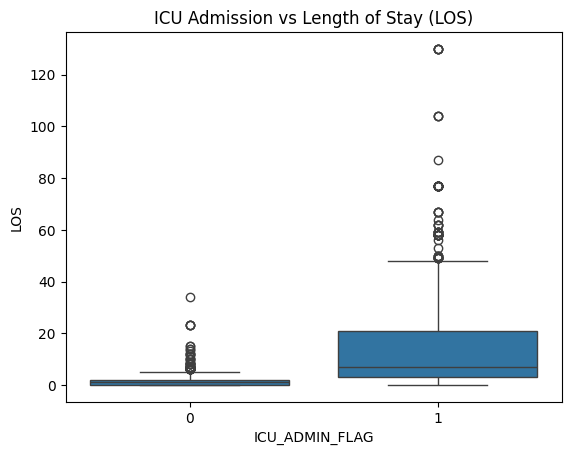

In [85]:
# Box plot to show the relationship between ICU admission and length of stay
sns.boxplot(x='ICU_ADMIN_FLAG', y='LOS', data=features)

# Add title
plt.title('ICU Admission vs Length of Stay (LOS)')

plt.show()

### ASA Rating vs Cardiovascular Condition (Violin Plot)

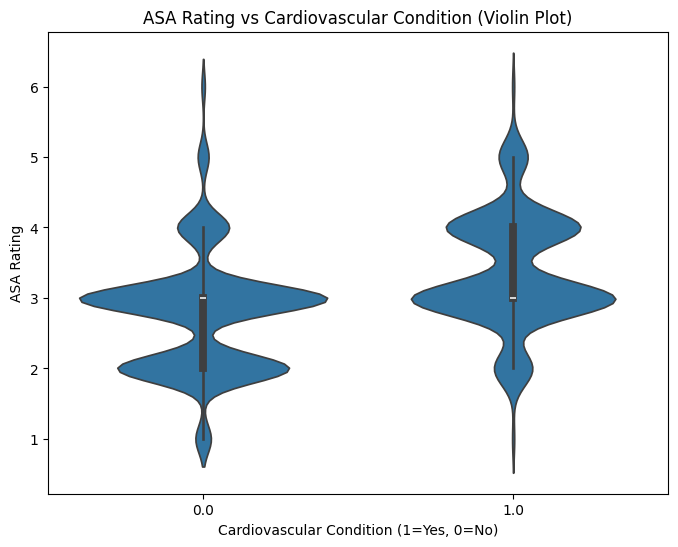

In [86]:
# Violin plot to show the relationship between ASA rating and cardiovascular condition
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cardiovascular', y='ASA_RATING_C', data=features)

# Add title and labels
plt.title('ASA Rating vs Cardiovascular Condition (Violin Plot)')
plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
plt.ylabel('ASA Rating')

plt.show()

### Relation between Gender and Cardiovascular Condition (Violin Plot)

C:\Users\user\AppData\Local\Temp\ipykernel_4948\2928789437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SEX', y='Cardiovascular', data=features, palette='muted')


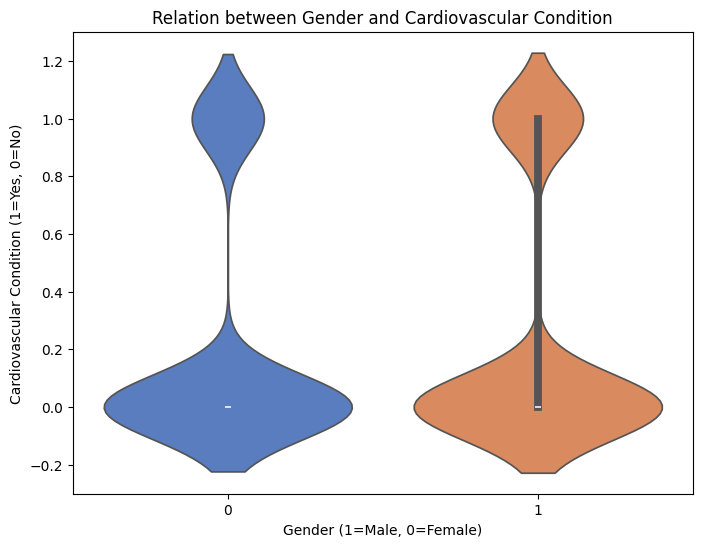

In [87]:
# Create a violin plot to show the relationship between gender and cardiovascular condition
plt.figure(figsize=(8, 6))
sns.violinplot(x='SEX', y='Cardiovascular', data=features, palette='muted')

# Add title and labels
plt.title('Relation between Gender and Cardiovascular Condition')
plt.xlabel('Gender (1=Male, 0=Female)')
plt.ylabel('Cardiovascular Condition (1=Yes, 0=No)')

plt.show()

### Relation between Cardiovascular Condition and Discharge Risk Level

<Figure size 800x600 with 0 Axes>

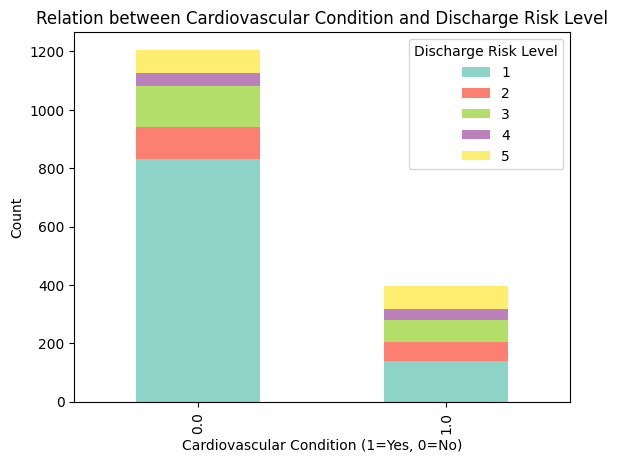

In [88]:
# Create a stacked bar chart for the relationship between cardiovascular condition and discharge risk level
plt.figure(figsize=(8, 6))
pd.crosstab(features['Cardiovascular'], features['discharge_risk_level']).plot(kind='bar', stacked=True, colormap='Set3')

# Add title, labels, and legend
plt.title('Relation between Cardiovascular Condition and Discharge Risk Level')
plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
plt.ylabel('Count')
plt.legend(title='Discharge Risk Level')

plt.show()

### Relation between Cardiovascular Condition and Length of Stay (LOS)

C:\Users\user\AppData\Local\Temp\ipykernel_4948\2215820095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cardiovascular', y='LOS', data=features, palette='Set2')


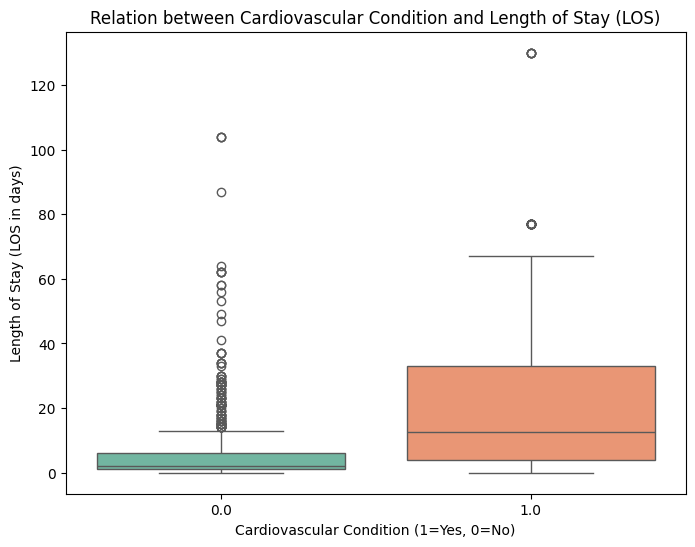

In [89]:
# Create a box plot to show the relationship between cardiovascular condition and length of stay
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cardiovascular', y='LOS', data=features, palette='Set2')

# Add title and labels
plt.title('Relation between Cardiovascular Condition and Length of Stay (LOS)')
plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
plt.ylabel('Length of Stay (LOS in days)')

plt.show()